# Let us import the necessary libraries
#### We would be needing pandas library to read the csv file, numpy libraries to work on calculating parameters like msre, rss etc. we would need seaborn and matplot lib to visually learn if there is a linear relationship between parameters. We would be using sklearn libraries to build a linear model, use regularlization like lasso and ridge.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Data Understanding and Exploration

In [2]:
data = pd.read_csv("train.csv")
pd.options.display.max_columns=300
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see that there are few columns having null values.
For example Alley, PoolQC, Fence, MiscFeatures, these columns have got very few not null values out of total 1460. Hence these columns should not contribute in building the model.
We should be dropping Id column also as it is not significant in model building

In [5]:
columns_to_drop = ["Alley","PoolQC","Fence","MiscFeature","Id"]
data = data.drop(columns=columns_to_drop)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [7]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


##### There are still few columns like LotFrontage which is having null values. Let's try to replace those null values 

In [8]:
data["LotFrontage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


###### This is a numeric column hence we can replace the null values with zero

In [9]:
data["LotFrontage"] = data["LotFrontage"].fillna(0)
data["LotFrontage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


Let us find out if there is a correlation between the target variable which is Sale Price with numeric variables in the dataset

In [10]:
numeric_variables = ["SalePrice","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
    "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd",
    "Fireplaces","GarageArea","GarageCars","PoolArea"]


In [11]:
corr=data[numeric_variables].corr()
corr

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,GarageCars,PoolArea
SalePrice,1.000000,0.209624,0.263843,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,0.533723,0.466929,0.623431,0.640409,0.092404
LotFrontage,0.209624,1.000000,0.100739,0.105255,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.221396,0.044018,0.201473,0.165229,0.114106
LotArea,0.263843,0.100739,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.154871,0.077672
MasVnrArea,0.477493,0.105255,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,0.280682,0.249070,0.373066,0.364204,0.011723
BsmtFinSF1,0.386420,0.076670,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,0.044316,0.260011,0.296970,0.224054,0.140491
BsmtFinSF2,-0.011378,-0.009312,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.035227,0.046921,-0.018227,-0.038264,0.041709
BsmtUnfSF,0.214479,0.160829,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.250647,0.051575,0.183303,0.214175,-0.035092
TotalBsmtSF,0.613581,0.238274,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.434585,0.126053
1stFlrSF,0.605852,0.245181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.409516,0.410531,0.489782,0.439317,0.131525
2ndFlrSF,0.319334,0.042549,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.616423,0.194561,0.138347,0.183926,0.081487


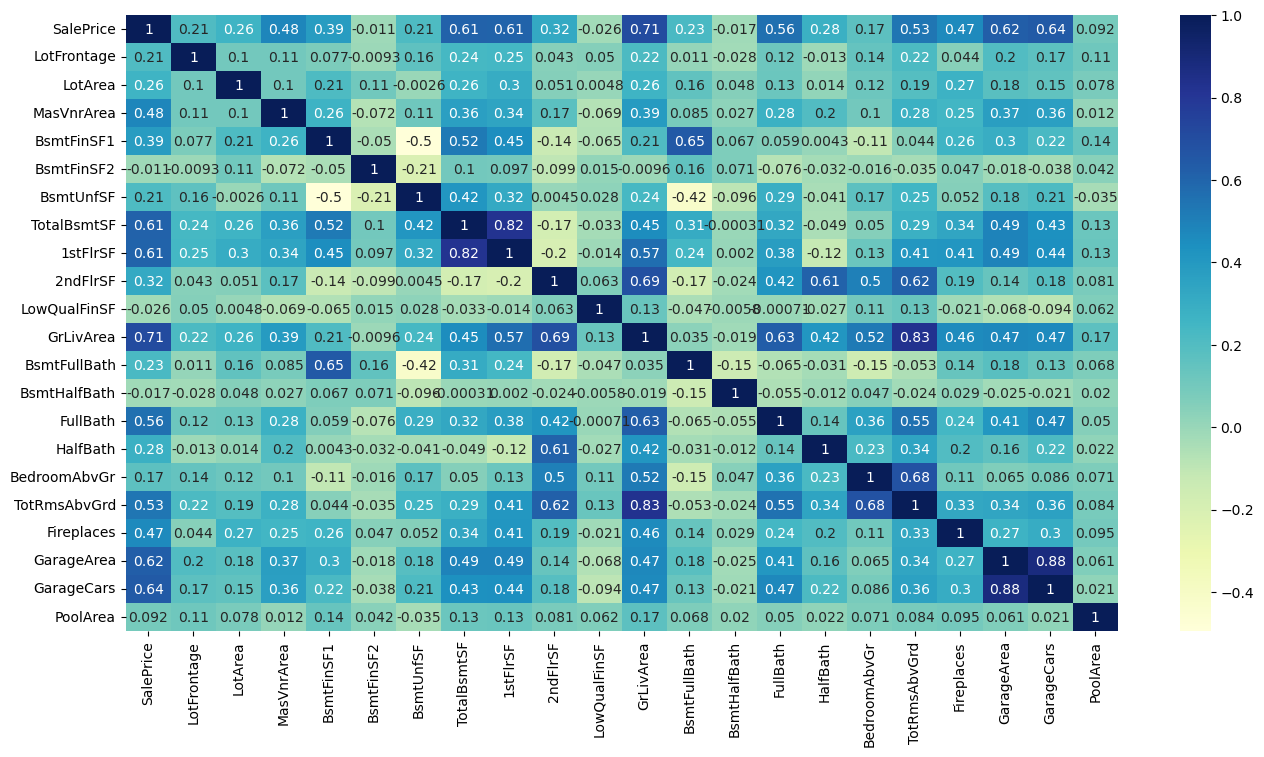

In [12]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()


###### Few things clear from above observations are 
SalePrice is highly correlated with TotalBsmtSF, 1stFlSF, GrLivArea,GarageCars & GarageArea

## Data Cleaning

##### Based on our understanding of data dictionary, there are few variables which logically does not mak sense in building the model 
For example we see the column Neighborhood which is the physical location of the property. However we see there are two more columns Condition1 & Condition2 which also describe Proximity to various conditions.

###### Hence we would be picking handful of columns for our analysis from the entire dataset

In [13]:
variables_for_model_building = ["LotArea","MSSubClass","MSZoning","Utilities","Neighborhood","BldgType","TotalBsmtSF",
                                "Heating","CentralAir","1stFlrSF","2ndFlrSF","BedroomAbvGr","KitchenAbvGr",
                                "GarageArea","PoolArea","YearBuilt","YearRemodAdd","Electrical",
                                "GarageType","SalePrice"]


In [14]:
housing_dataset = data[variables_for_model_building]
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   MSSubClass    1460 non-null   int64 
 2   MSZoning      1460 non-null   object
 3   Utilities     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   BldgType      1460 non-null   object
 6   TotalBsmtSF   1460 non-null   int64 
 7   Heating       1460 non-null   object
 8   CentralAir    1460 non-null   object
 9   1stFlrSF      1460 non-null   int64 
 10  2ndFlrSF      1460 non-null   int64 
 11  BedroomAbvGr  1460 non-null   int64 
 12  KitchenAbvGr  1460 non-null   int64 
 13  GarageArea    1460 non-null   int64 
 14  PoolArea      1460 non-null   int64 
 15  YearBuilt     1460 non-null   int64 
 16  YearRemodAdd  1460 non-null   int64 
 17  Electrical    1459 non-null   object
 18  GarageType    1379 non-null   object
 19  SalePr

In [15]:
housing_dataset.head(5)

,LotArea,MSSubClass,MSZoning,Utilities,Neighborhood,BldgType,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YearBuilt,YearRemodAdd,Electrical,GarageType,SalePrice
0,8450,60,RL,AllPub,CollgCr,1Fam,856,GasA,Y,856,854,3,1,548,0,2003,2003,SBrkr,Attchd,208500
1,9600,20,RL,AllPub,Veenker,1Fam,1262,GasA,Y,1262,0,3,1,460,0,1976,1976,SBrkr,Attchd,181500
2,11250,60,RL,AllPub,CollgCr,1Fam,920,GasA,Y,920,866,3,1,608,0,2001,2002,SBrkr,Attchd,223500
3,9550,70,RL,AllPub,Crawfor,1Fam,756,GasA,Y,961,756,3,1,642,0,1915,1970,SBrkr,Detchd,140000
4,14260,60,RL,AllPub,NoRidge,1Fam,1145,GasA,Y,1145,1053,4,1,836,0,2000,2000,SBrkr,Attchd,250000


##### Of the 21 columns we have selected, we see some are of categorical type, let us convert them to dummy variables

In [16]:
categorical_variables = ["Neighborhood","MSSubClass","MSZoning","Utilities","BldgType","Heating","Electrical","GarageType"]

###### Let us loop through all categorical variables and create dummy variables dataframe &  concat the dataframe of dummy variables with main dataset

In [17]:
for categorical_var in categorical_variables:
    print("Creating dummy variabels for categorical variable {}".format(categorical_var))
    dummy_var_df = pd.get_dummies(housing_dataset[categorical_var],prefix=categorical_var+"_",dtype=int,drop_first=True)
    housing_dataset = pd.concat([housing_dataset,dummy_var_df],axis=1)

Creating dummy variabels for categorical variable Neighborhood
Creating dummy variabels for categorical variable MSSubClass
Creating dummy variabels for categorical variable MSZoning
Creating dummy variabels for categorical variable Utilities
Creating dummy variabels for categorical variable BldgType
Creating dummy variabels for categorical variable Heating
Creating dummy variabels for categorical variable Electrical
Creating dummy variabels for categorical variable GarageType


In [18]:
housing_dataset.drop(columns=categorical_variables,inplace=True)
housing_dataset.shape

(1460, 73)

In [19]:
housing_dataset.head(10)

,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd
0,8450,856,Y,856,854,3,1,548,0,2003,2003,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,9600,1262,Y,1262,0,3,1,460,0,1976,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,11250,920,Y,920,866,3,1,608,0,2001,2002,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
3,9550,756,Y,961,756,3,1,642,0,1915,1970,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,14260,1145,Y,1145,1053,4,1,836,0,2000,2000,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
5,14115,796,Y,796,566,1,1,480,0,1993,1995,143000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
6,10084,1686,Y,1694,0,3,1,636,0,2004,2005,307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
7,10382,1107,Y,1107,983,3,1,484,0,1973,1973,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
8,6120,952,Y,1022,752,2,2,468,0,1931,1950,129900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
9,7420,991,Y,1077,0,2,2,205,0,1939,1950,118000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


###### CentralAir is a binary categorical variable, let's replace it with binary values

In [20]:
housing_dataset["CentralAir"] = housing_dataset["CentralAir"].map({'Y':1,'N':0})
housing_dataset.head()

,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd
0,8450,856,1,856,854,3,1,548,0,2003,2003,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,9600,1262,1,1262,0,3,1,460,0,1976,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,11250,920,1,920,866,3,1,608,0,2001,2002,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
3,9550,756,1,961,756,3,1,642,0,1915,1970,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,14260,1145,1,1145,1053,4,1,836,0,2000,2000,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


##### Columns YearBuilt and YearRemodAdd will have more impact on sale of the property as the one that was build 10 years back will be sold at a higher price than the one that was built 30 years back. 

Let us convert this column into a numeric column ageOfProperty describing the age of the property. If property that was built in 2014 will have age of 10 years, hence the column ageOfProperty will have numeric value 10 

In [21]:
current_year = datetime.now().year
housing_dataset["ageOfProperty"] =  current_year - housing_dataset["YearBuilt"]

In [22]:
housing_dataset.head()

,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,ageOfProperty
0,8450,856,1,856,854,3,1,548,0,2003,2003,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,21
1,9600,1262,1,1262,0,3,1,460,0,1976,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,48
2,11250,920,1,920,866,3,1,608,0,2001,2002,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,23
3,9550,756,1,961,756,3,1,642,0,1915,1970,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,109
4,14260,1145,1,1145,1053,4,1,836,0,2000,2000,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,24


###### Simillary we can create another column ageSinceRemodel which would be current year subtracted by YearRemodAdd that will describe age of the property since it has been remodeled

In [23]:
housing_dataset["ageSinceRemodel"] =  current_year - housing_dataset["YearRemodAdd"]

In [24]:
#Let us drop the variables YearBuilt & YearRemodAdd from the dataset
housing_dataset = housing_dataset.drop(columns=["YearBuilt","YearRemodAdd"])
housing_dataset.head()

,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,SalePrice,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,ageOfProperty,ageSinceRemodel
0,8450,856,1,856,854,3,1,548,0,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,21,21
1,9600,1262,1,1262,0,3,1,460,0,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,48,48
2,11250,920,1,920,866,3,1,608,0,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,23,22
3,9550,756,1,961,756,3,1,642,0,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,109,54
4,14260,1145,1,1145,1053,4,1,836,0,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,24,24


## Data Preparation and Model Building

#### Linear Regression
Lets see if we can visually see a linear relationship between the target variable and few of the independent variable

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

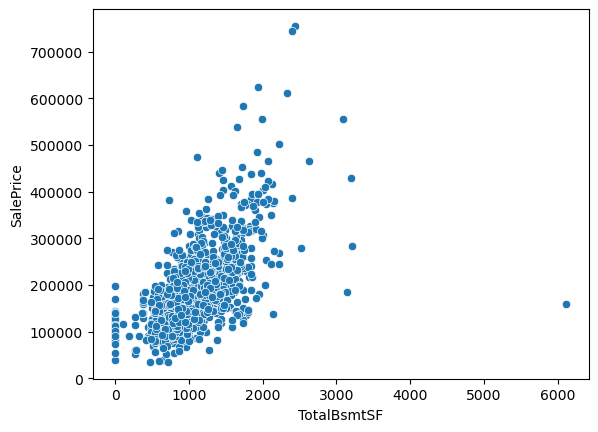

In [25]:
sns.scatterplot(data=housing_dataset, x="TotalBsmtSF",y="SalePrice")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

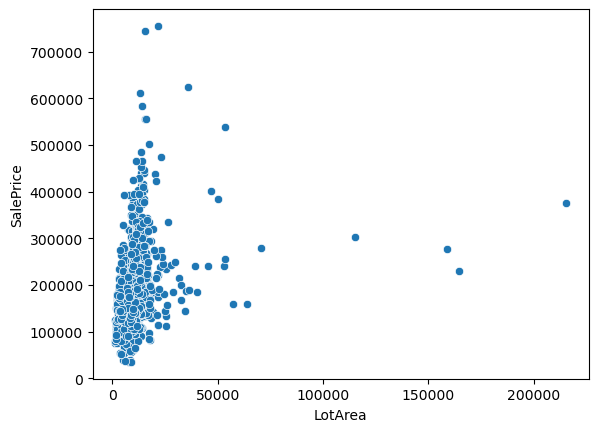

In [26]:
sns.scatterplot(data=housing_dataset, x="LotArea",y="SalePrice")

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

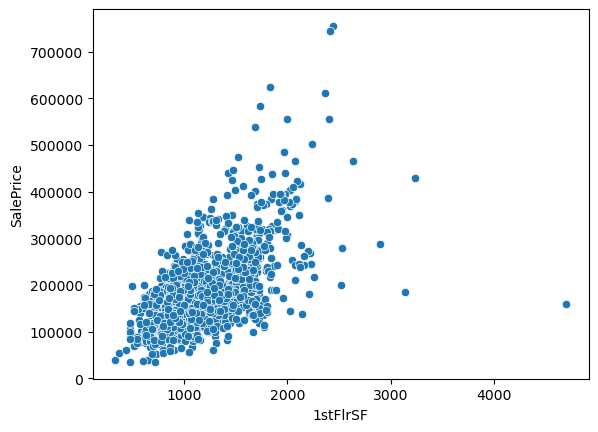

In [27]:
sns.scatterplot(data=housing_dataset, x="1stFlrSF",y="SalePrice")

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

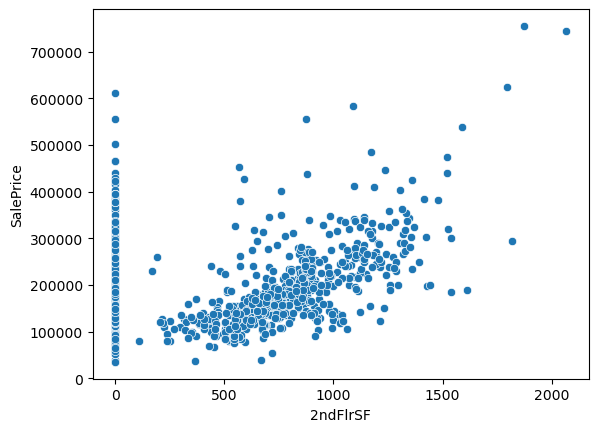

In [28]:
sns.scatterplot(data=housing_dataset, x="2ndFlrSF",y="SalePrice")

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

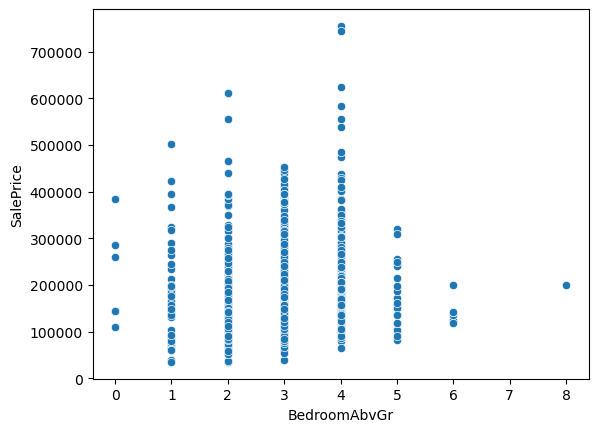

In [29]:
sns.scatterplot(data=housing_dataset, x="BedroomAbvGr",y="SalePrice")

###### We do see a linear relationship of SalePrice with 1stFlrSF, TotalBsmtSF however for 2ndFlrSF and BedroomAbvGr we don't see the price linearly increasing 


#### Let us build LinearRegression model
Create training X & Y dataset